In [2]:
from PIL import Image #Libreria PILLOW
import numpy as np    #Libreria NUMPY

## Apertura de imagen

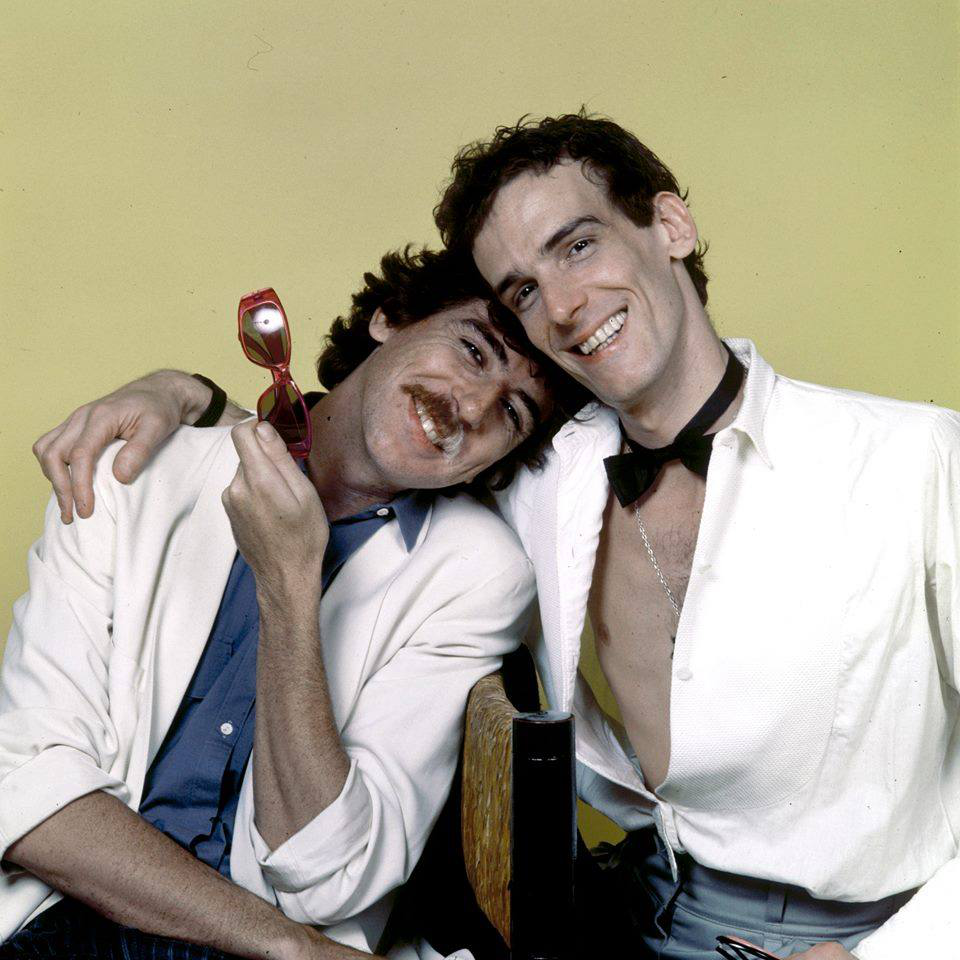

In [3]:
im= Image.open("spinetta.jpg")
im

## Obtención de información de la componente imagen

In [4]:
rgb_im = im.convert('RGB')
a = np.asarray(im)
a

array([[[196, 193, 140],
        [196, 193, 140],
        [196, 193, 140],
        ...,
        [184, 184, 124],
        [188, 188, 128],
        [192, 192, 132]],

       [[196, 193, 140],
        [196, 193, 140],
        [196, 193, 140],
        ...,
        [184, 184, 124],
        [187, 187, 127],
        [191, 191, 131]],

       [[196, 193, 140],
        [196, 193, 140],
        [196, 193, 140],
        ...,
        [185, 185, 125],
        [188, 188, 128],
        [190, 190, 130]],

       ...,

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   7],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[  5,   5,   7],
        [  5,   5,   7],
        [  5,   5,   7],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[  0,   1,   3],
        [  0,   1,   3],
        [  0,   1,   3],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [254, 254, 254]]

## Información de la imagen

In [5]:
tamaño=im.size
formato= im.format
modo= im.mode
tamaño , formato, modo

((960, 960), 'JPEG', 'RGB')

## Guardar componente imagen archivo

In [8]:
np.save("spinetta.npy", a)

## Apertura de componente imagen

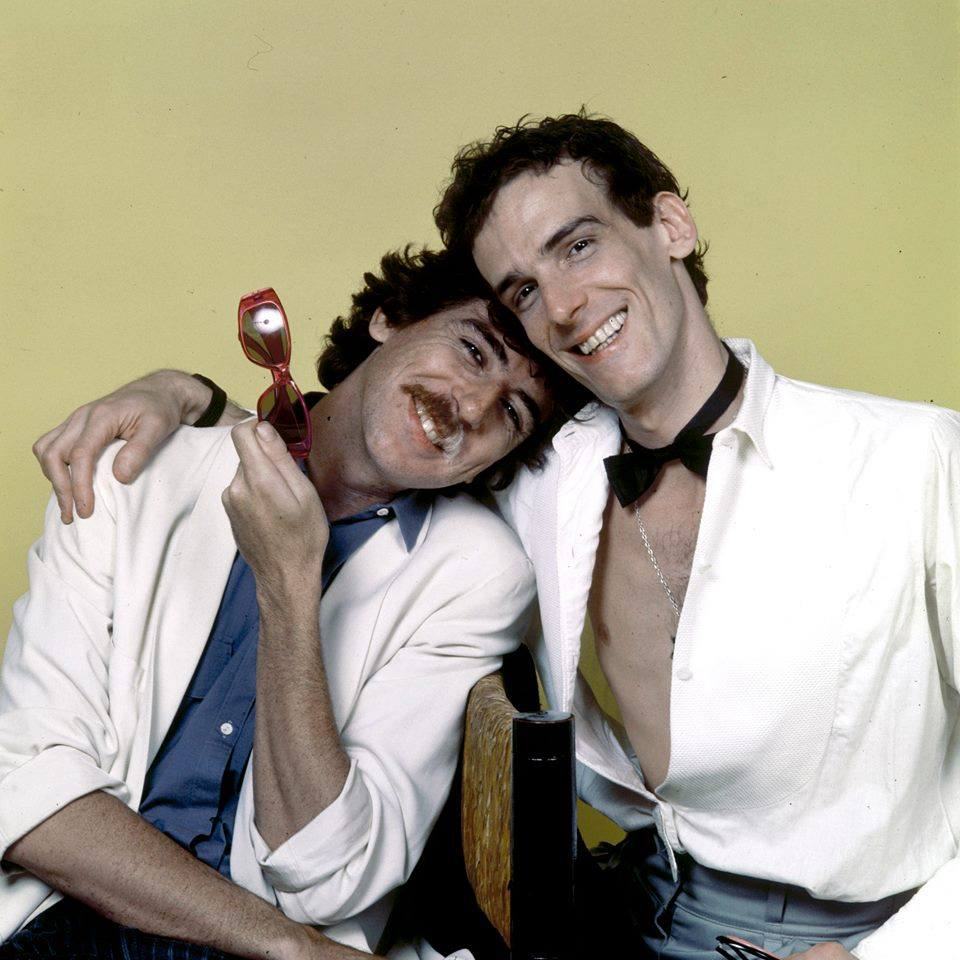

In [9]:
b = np.load('spinetta.npy')
new_im=  Image.fromarray(b)
new_im

## Modificar tamaño

In [7]:
im1 = im.resize((200, 135), Image.ANTIALIAS)  


## Guardar nueva imagen

In [8]:
im2= im1.save("spinetta_chico.jpg")

## Recortar Imagen

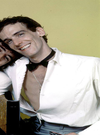

In [9]:
im3=im1.crop((100,0,200,135)) #izquierda, arriba, derecha, abajo
im3


## Rotar Imagen

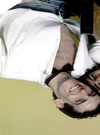

In [10]:
im4= im3.rotate(180) #Angul
im4

## Información sobre la matriz RGB

In [14]:
c= np.asarray(im1)
Dimension= c.ndim
Tamaño= c.size 
Tipo= c.dtype
ancho= c.shape[0]
alto= c.shape[1]
prof= c.shape[2]
print("Dimensión: ", Dimension)
print("Tamaño: ", Tamaño)
print("Tipo: ", Tipo)
print("Ancho: ", ancho)
print("Alto: ", alto)
print("Profundidad: ", prof)

Dimensión:  3
Tamaño:  81000
Tipo:  uint8
Ancho:  135
Alto:  200
Profundidad:  3


## Modificación Bytes RGB
Se modificará los valores de los bytes, aquellos valores de Azul mayores a 100, se llevarán a 255, por lo tanto se observará una saturación de Azul en la imagen

In [18]:
c_nuevo= np.zeros((ancho, alto, prof),'uint8')
for x in range(ancho):
    for y in range(alto):
        for z in range(prof):
            if c[x][y][2]>100:
                c_nuevo[x][y][2]= 255
            else:
                c_nuevo[x][y][z]= c[x][y][z]
            
c_nuevo

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [ 22,  27,  34],
        [  2,   9,  18],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  2,   0,   7],
        [  3,   3,   0],
        [  4,   3,   5],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  5,   2,   3],
        [  5,   2,   4],
        [  4,   1,   2],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

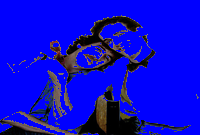

In [19]:
im5= Image.fromarray(c_nuevo)
im5

En este caso se llevaran todos los bytes a 0 de los pixeles de índice en X 100 hasta el final. Lo que provocará una franja negra en X.

In [20]:
for x in range(ancho):
    for y in range(alto):
        for z in range(prof):
            if x>100:
                c_nuevo[x][y][z]= 0
            else:
                c_nuevo[x][y][z]= c[x][y][z]
            
c_nuevo

array([[[196, 193, 140],
        [196, 193, 140],
        [195, 192, 139],
        ...,
        [182, 182, 122],
        [183, 183, 123],
        [188, 188, 127]],

       [[195, 192, 139],
        [195, 192, 139],
        [194, 191, 138],
        ...,
        [182, 182, 122],
        [182, 182, 122],
        [185, 185, 125]],

       [[195, 192, 139],
        [195, 192, 139],
        [196, 193, 140],
        ...,
        [182, 182, 124],
        [182, 182, 122],
        [184, 184, 122]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

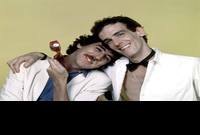

In [21]:
im6= Image.fromarray(c_nuevo)
im6

# FIN